# Getting Physiobank data with the WFDB package #

An efficient way of downloading all of the records of a given Physiobank database is using the wfdb Python package (https://github.com/MIT-LCP/wfdb-python). In this case, the Gait Dynamics in Neuro-Degenerative Disease records will be downloaded.

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import wfdb

%matplotlib inline

First, let's see a list of all the available Physiobank databases

In [2]:
dbs = wfdb.get_dbs()
display(dbs)

[['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database [sample excluded record]'],
 ['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['chfdb', 'BIDMC Congestive Heart Failure Database'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['capslpdb', 'CAP Sleep Database'],
 ['crisdb', 'CAST RR Interval Sub-Study Database'],
 ['cves', 'Cerebral Vasoregulation in Elderly with Stroke'],
 ['challenge/2009/test-set-a', 'Challenge 2009 Test Set A'],
 ['challenge/2009/test-set-b', 'Challenge 2009 Test Set B'],
 ['challenge/2010/set-a', 'Challenge 2010 Training Set A'],
 ['challenge/2010/set-b', 'Challenge 2010 Test Set B'],
 ['challenge/2010/set-c', 'Challenge 2010 Test Set C'],
 ['challenge/2011/sim', 'Challenge 2011 Pilot Set'],
 ['challenge/2011/set-a', 'Challenge 2011 Training Set A'],
 ['challenge/2011/set-b', 'Chall

Let's download the _gaitndd_ database into our working directory

In [10]:
cwd = os.getcwd()
data_dir = cwd + '/data/'
wfdb.dl_database('gaitndd', dl_dir=data_dir)

Finished downloading files


The database also includes time series data in plain text format. These files have not been downloaded with the wfdb.dldatabase function. Using the following libraries it is possible to retrieve the necessary files from the links in the _gaitndd_ website

In [12]:
import urllib.request
from bs4 import BeautifulSoup
import requests

In [36]:
# Download all .ts files
url = 'https://physionet.org/physiobank/database/gaitndd'
r = requests.get(url)
soup = BeautifulSoup(r.text)
link = ''
for i, line in enumerate(soup.findAll('a', href=True)):
    link = line.get('href')
    if link[-3:] == '.ts':
        print('Downloading', link + '...')
        file_url = url + '/' + link
        urllib.request.urlretrieve(file_url, data_dir + link)

### Test record
Now let's take a look at a sample record from this dataset.

In [5]:
cwd = os.getcwd()

In [6]:
test_record = wfdb.rdrecord("data/als1")

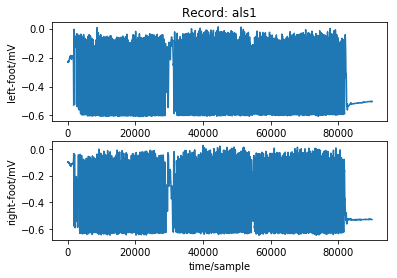

In [7]:
wfdb.plot_wfdb(test_record)

In [30]:
test_record_header = wfdb.rdheader("data/park1")
display(test_record_header.__dict__)

{'record_name': 'park1',
 'n_sig': 2,
 'fs': 300,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 90000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['left-foot', 'right-foot'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['park1.let', 'park1.rit'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [1000.0, 1000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-96, 235],
 'checksum': [24342, -21509],
 'block_size': [0, 0]}

In [31]:
header = ["Elapsed Time",
        "Left Stride Interval",
        "Right Stride Interval",
        "Left Swing Interval",
        "Right Swing Interval",
        "Left Swing Percent",
        "Right Swing Percent",
        "Left Stance Interval",
        "Right Stance Interval",
        "Left Stance Percent",
        "Right Stance Percent",
        "Double Support Interval",
        "Double Support Percent"]
test_df = pd.read_csv("data/park1.ts", sep="\t", names=header)

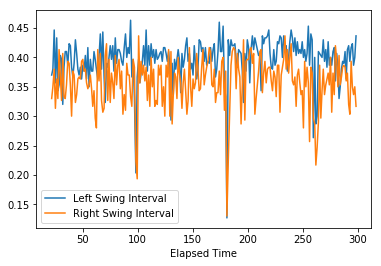

In [32]:
test_df.plot(x="Elapsed Time", y=["Left Swing Interval", "Right Swing Interval"])

In [33]:
test_df_mod = test_df.copy(deep=True)
test_df_mod["Time"] = test_df_mod["Elapsed Time"] - test_df_mod["Elapsed Time"].min()

In [34]:
test_df_mod.drop(["Elapsed Time"], axis=1)

,Left Stride Interval,Right Stride Interval,Left Swing Interval,Right Swing Interval,Left Swing Percent,Right Swing Percent,Left Stance Interval,Right Stance Interval,Left Stance Percent,Right Stance Percent,Double Support Interval,Double Support Percent,Time
0,1.1333,1.0933,0.3700,0.3300,32.65,30.18,0.7633,0.7633,67.35,69.82,0.4333,38.24,0.0000
1,1.1067,1.1200,0.3800,0.3500,34.34,31.25,0.7267,0.7700,65.66,68.75,0.3767,34.04,1.1067
2,1.2067,1.1467,0.4467,0.3800,37.02,33.14,0.7600,0.7667,62.98,66.86,0.3800,31.49,2.3133
3,1.0833,1.1200,0.3567,0.3133,32.92,27.98,0.7267,0.8067,67.08,72.02,0.4133,38.15,3.3967
4,1.1767,1.1567,0.4333,0.3633,36.83,31.41,0.7433,0.7933,63.17,68.59,0.3800,32.29,4.5733
5,1.0667,1.1567,0.3433,0.3300,32.19,28.53,0.7233,0.8267,67.81,71.47,0.3933,36.88,5.6400
6,1.1000,1.1300,0.3533,0.4133,32.12,36.58,0.7467,0.7167,67.88,63.42,0.3333,30.30,6.7400
7,1.1133,1.0500,0.4033,0.3700,36.23,35.24,0.7100,0.6800,63.77,64.76,0.3400,30.54,7.8533
8,1.1300,1.0967,0.3967,0.3267,35.10,29.79,0.7333,0.7700,64.90,70.21,0.4067,35.99,8.9833
9,1.1067,1.2133,0.3200,0.4067,28.92,33.52,0.7867,0.8067,71.08,66.48,0.3800,34.34,10.0900


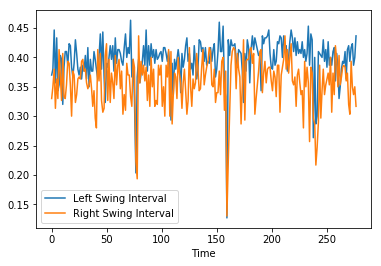

In [35]:
test_df_mod.plot(x="Time", y=["Left Swing Interval", "Right Swing Interval"])

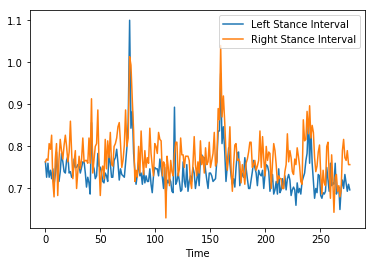

In [36]:
test_df_mod.plot(x="Time", y=["Left Stance Interval", "Right Stance Interval"])